<a href="https://colab.research.google.com/github/eluyutao/MMAI-Deep-Learning-Projects/blob/main/10102688_Lu_Lucas_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 894 - Exercise 1 - 10102688 - Lucas Lu
## Feedforward artificial neural network : Image classification

<font color='red'>Student ID: 10102688

<font color='red'>Name: Lucas Lu

The goal of this excercise is to show you how to create your first neural network using the tensorflow/keras library. We will be using the MNIST dataset.

Submission instructions:
- You cannot edit this notebook directly. Save a copy to your drive, and make sure to identify yourself in the title using name and student number
- Do not insert new cells before the final one (titled "Further exploration") 
- Verify that your notebook can _restart and run all_. 
- Select File -> Download as .py (important! not as ipynb)
- Rename the file: `studentID_lastname_firstname_ex1.py`
- The mark will be assessed on the implementation of the functions with #TODO
- **Do not change anything outside the functions**  unless in the further exploration section
- The mark is not based on final accuracy - only on correctness
- Note: You do not have to answer the questions in thie notebook as part of your submission. They are meant to guide you.

- You should not need to use any additional libraries other than the ones listed below. You may want to import additional modules from those libraries, however.

References
- https://keras.io/getting-started/sequential-model-guide/
- https://keras.io/api/utils/python_utils/#to_categorical-function
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/models/model_training_apis/


### Libraries

In [1]:
# Import modules
# Add modules as needed
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
# import matplotlib
# matplotlib.use('agg')

import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Data preparation

#### Import data

In [2]:
def load_data():
    # Import MNIST dataset from openml
    dataset = fetch_openml('mnist_784', version=1, data_home=None)

    # Data preparation
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()



## Consider the following
- what shape is X?
- what value ranges does X take? 
 - might this present a problem? 
 - what transformations need to be applied?
- what shape is Y?
- what value ranges does Y take? 
 - what transformations should be applied?

In [3]:
def clean_data(raw_X, raw_Y):
    # TODO: clean, QA, and prep raw_X and raw_Y
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION


    cleaned_X = raw_X
    cleaned_Y = keras.utils.to_categorical(raw_Y, num_classes=10)
    
    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)

#### Data split

- Split your data into a train set (50%), validation set (20%) and a test set (30%). You may use scikit-learn's train_test_split function.

In [4]:
def split_data(cleaned_X, cleaned_Y):
    # TODO: split the data
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    X_train, X_test, Y_train, Y_test = train_test_split(cleaned_X, cleaned_Y, test_size=0.5, train_size=0.5, random_state=1)
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.6, train_size=0.4, random_state=1)
    return X_val, X_test, X_train, Y_val, Y_test, Y_train

X_val, X_test, X_train, Y_val, Y_test, Y_train = split_data(cleaned_X, cleaned_Y)

#### [Optional]: plot your data with matplotlib
- Hint: you will need to reshape the row's data into a 28x28 matrix
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

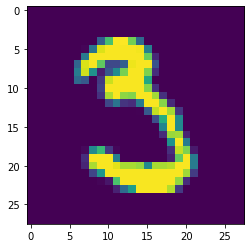

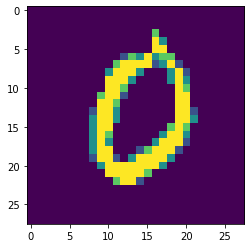

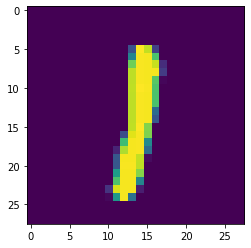

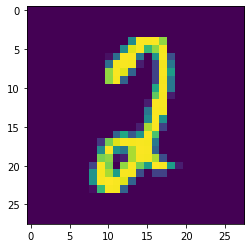

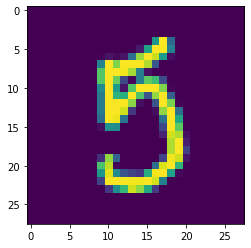

In [5]:
def viz_data(X_train):
    # TODO: (optional) plot your data with matplotlib
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    
    # only plot first five images
    X_train_head = X_train.head()
    for i in range(X_train_head.shape[0]):
      tmp = X_train_head.iloc[i, :].values.reshape((28, 28))
      plt.imshow(tmp)
      plt.show()

viz_data(X_train)

### Model

#### Neural network structure
- For this network, we'll use 2 hidden layers
- Layer 1 should have 128 nodes, a dropout rate of 20%, and relu as its activation function
- Layer 2 should have 64 nodes, a dropout rate of 20%, and relu as its activation function
- The last layer should map back to the 10 possible MNIST class. Use softmax as the activation



In [6]:
def build_model():
    # TODO: build the model, 
    # HINT: you should have Total params: 109,386
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    model = keras.Sequential()
    model.add(keras.layers.Dense(128, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

model = build_model()


# Model compilation

- what loss function should you use?
- Note your choice of optimizer
- Include accuracy as a metric (why are we using accuracy here?)

# Model training
- Use a batch size of 128, and train for 12 epochs
- Use verbose training, include validation data


In [7]:
def compile_model(model):
    # TODO: compile the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

def train_model(model, X_train, Y_train, X_val, Y_val):
    # TODO: train the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    history = model.fit(
        X_train,
        Y_train,
        batch_size=128,
        epochs=12,
        verbose=2,
        validation_data=(X_val, Y_val))
    return model, history


model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)

Epoch 1/12
274/274 - 2s - loss: 6.9998 - accuracy: 0.6276 - val_loss: 0.8918 - val_accuracy: 0.7679 - 2s/epoch - 8ms/step
Epoch 2/12
274/274 - 1s - loss: 1.1106 - accuracy: 0.7487 - val_loss: 0.6051 - val_accuracy: 0.8571 - 1s/epoch - 4ms/step
Epoch 3/12
274/274 - 1s - loss: 0.8006 - accuracy: 0.8065 - val_loss: 0.5332 - val_accuracy: 0.8760 - 1s/epoch - 5ms/step
Epoch 4/12
274/274 - 1s - loss: 0.6444 - accuracy: 0.8427 - val_loss: 0.4313 - val_accuracy: 0.9029 - 1s/epoch - 5ms/step
Epoch 5/12
274/274 - 1s - loss: 0.5355 - accuracy: 0.8664 - val_loss: 0.3593 - val_accuracy: 0.9106 - 1s/epoch - 5ms/step
Epoch 6/12
274/274 - 1s - loss: 0.4688 - accuracy: 0.8806 - val_loss: 0.3323 - val_accuracy: 0.9174 - 1s/epoch - 5ms/step
Epoch 7/12
274/274 - 1s - loss: 0.4227 - accuracy: 0.8883 - val_loss: 0.3270 - val_accuracy: 0.9179 - 1s/epoch - 5ms/step
Epoch 8/12
274/274 - 1s - loss: 0.3691 - accuracy: 0.9035 - val_loss: 0.3074 - val_accuracy: 0.9271 - 1s/epoch - 5ms/step
Epoch 9/12
274/274 - 1s 

# Model evaluation
- Show the performance on the test set
- What is the difference between "evaluate" and "predict"?
- Identify a few images the model classifies incorrectly. Any observations?

In [8]:
def eval_model(model, X_test, Y_test):
    # TODO: evaluate the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    test_loss, test_accuracy = model.evaluate(X_test, Y_test)
    return test_loss, test_accuracy

test_loss, test_accuracy = eval_model(model, X_test, Y_test)

657/657 [==============================] - 1s 2ms/step - loss: 0.2814 - accuracy: 0.9338


## Further exploration (Not evaluated)
Looking for something else  to do?
- Transform your code to do hyperparameter search. 
- You can vary the number of nodes in the layers, the drop out rate, the optimizer and the parameters in Adam, the batch size, etc.
